# E-commerce Sales Analysis (EDA)

**Dataset:** Superstore Sales  
**Objective:**  The goal of this project is to analyze sales, profitability, and customer behavior using exploratory data analysis (EDA) to identify growth opportunities, inefficiencies, and actionable business insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding="latin1")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

Data cleaning is a critical step to ensure consistency, correct data types, and reliable analysis. Incorrect formats or missing values can lead to misleading insights and inaccurate conclusions.


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub-category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [7]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])


In [8]:
df.dtypes


row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

Data cleaning ensures consistency, accurate analysis, and prevents misleading insights due to incorrect data types or missing values.

## Univariate Analysis

### Numeric Variables
- Sales
- Quantity
- Profit


In [9]:
df["sales"].describe()


count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: sales, dtype: float64

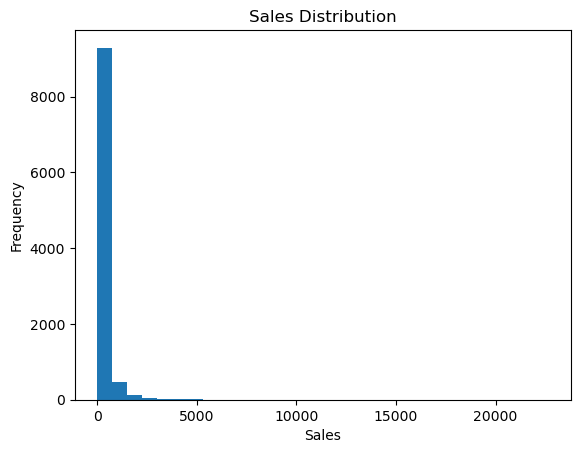

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["sales"], bins=30)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()


Sales distribution is right-skewed, indicating that most orders have lower sales values while a small number of high-value orders contribute significantly to total revenue.


In [11]:
df["profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: profit, dtype: float64

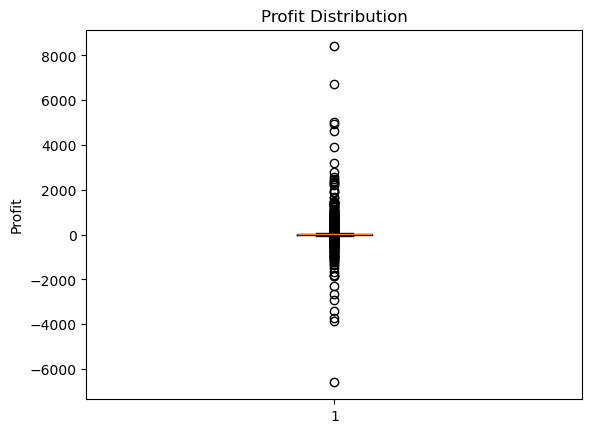

In [12]:
plt.boxplot(df["profit"])
plt.title("Profit Distribution")
plt.ylabel("Profit")
plt.show()

The presence of negative profit values indicates that some transactions are loss-making, likely due to high discounts or operational costs.


In [13]:
df["quantity"].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: quantity, dtype: float64

In [14]:
df["category"].value_counts()

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

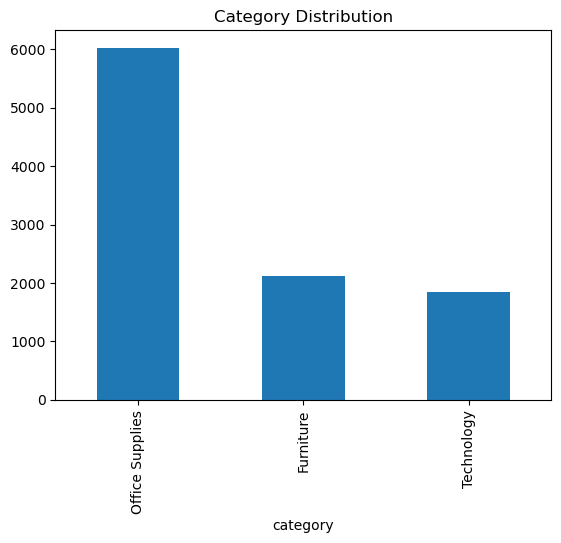

In [15]:
df["category"].value_counts().plot(kind="bar")
plt.title("Category Distribution")
plt.show()



### Key Univariate Insights:

1. Sales distribution is right-skewed, indicating many low-value orders and a few high-value transactions driving revenue.
2. Profit distribution shows that several transactions generate losses.
3. Office Supplies has the highest number of orders, followed by Furniture and Technology.
4. Most orders consist of small quantities (1–5 items).


# Bivariate Analysis
Goal: Understand relationships between two variables (Sales, Profit, Discount, Category, Quantity).


## 1) Sales by Category
Question: Which category generates the highest total sales?


In [16]:
df.groupby("category")["sales"].sum().sort_values(ascending=False)


category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64

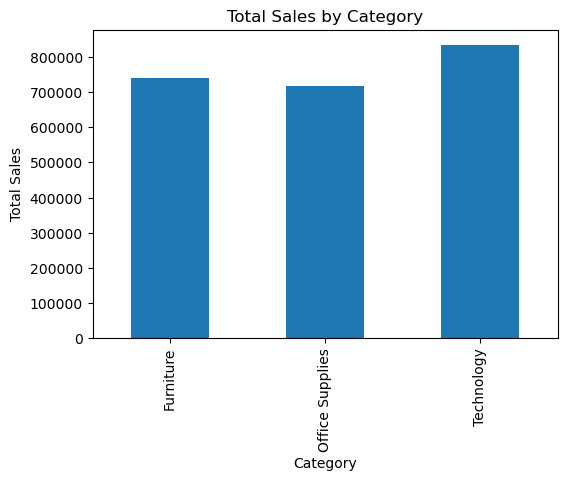

In [17]:
df.groupby("category")["sales"].sum().plot(
    kind="bar",
    title="Total Sales by Category",
    ylabel="Total Sales",
    xlabel="Category",
    figsize=(6,4)
)
plt.show()


**Insight:** From the totals, we can see which category contributes most to revenue.  
(Write 1 line: “Technology leads in sales” or whatever your output shows.)


## 2) Profit by Category
Question: Which category is most profitable overall?


In [18]:
profit_by_cat = df.groupby("category")["profit"].sum().sort_values(ascending=False)
profit_by_cat


category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: profit, dtype: float64

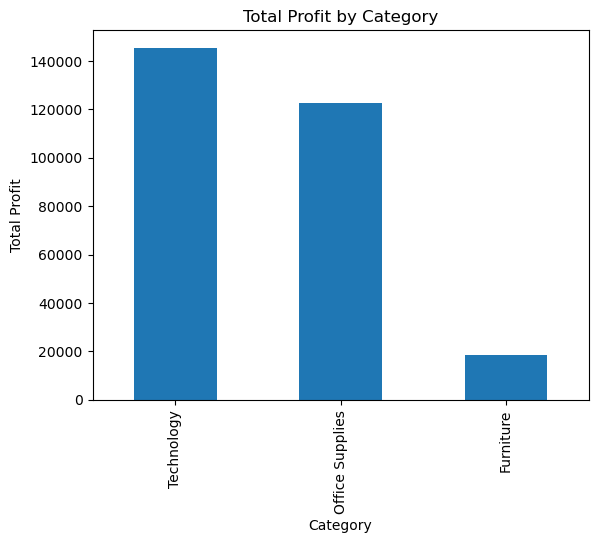

In [19]:
profit_by_cat.plot(kind="bar", title="Total Profit by Category", ylabel="Total Profit", xlabel="Category")
plt.show()


**Insight:** High sales does not always mean high profit.  
(Write 1 line: “Category X has high sales but lower profit” based on your result.)


## 3) Quantity vs Sales
Question: Does higher quantity always mean higher sales?


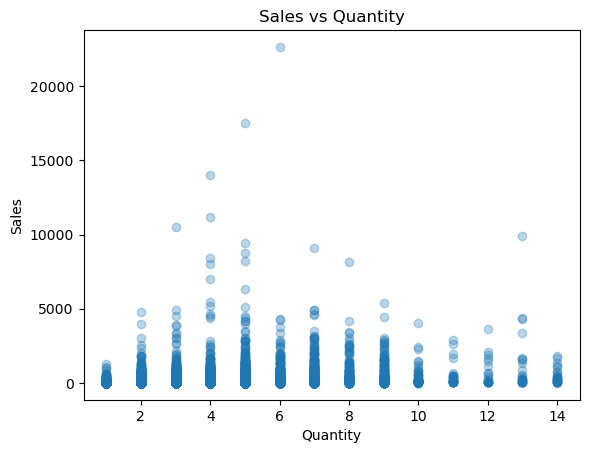

In [20]:
plt.scatter(df["quantity"], df["sales"], alpha=0.3)
plt.title("Sales vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.show()


**Insight:** The scatter plot shows whether quantity and sales move together.  
Sales increase with quantity; however, higher quantities do not always result in higher profit, especially when large discounts are applied.


## 4) Discount vs Profit
Question: Do higher discounts reduce profit?


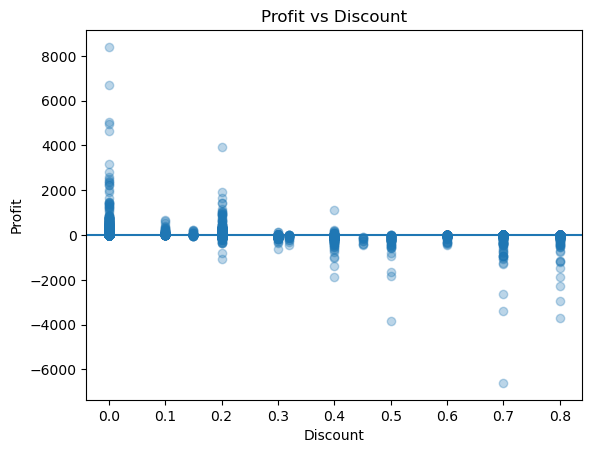

In [21]:
plt.scatter(df["discount"], df["profit"], alpha=0.3)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(0)  # reference line: profit=0
plt.show()


**Insight:** Look for a downward trend (higher discount → lower profit).  
There is a strong negative relationship between discount and profit, confirming that excessive discounting significantly reduces profitability.



## 5) Profit by Region
Question: Which region contributes the most profit?


In [22]:
profit_by_region = df.groupby("region")["profit"].sum().sort_values(ascending=False)
profit_by_region


region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64

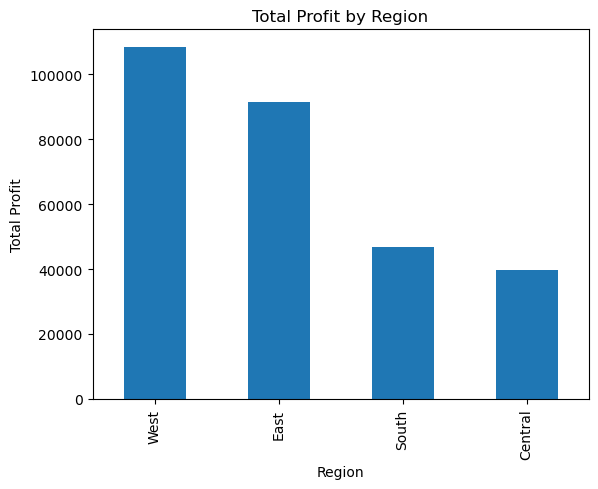

In [23]:
profit_by_region.plot(kind="bar", title="Total Profit by Region", ylabel="Total Profit", xlabel="Region")
plt.show()


**Insight:** The western region generates the highest profit, indicating strong pricing and demand compared to other regions.

## Bivariate Analysis – Key Findings (Summary)
1. Category with highest sales: Technology  
2. Category with highest profit: Furniture
3. Discount impact on profit:Negative 
4. Sales increase with quantity, but high quantities do not always guarantee higher profit due to discounting.
5. Most profitable region: West


# Multivariate Analysis

In this section, we analyze how multiple variables interact together to influence business performance, focusing on Sales and Profit across different categories, regions, and customer segments.


Multivariate analysis helps understand how multiple variables such as category, region, and discount interact together to influence sales and profitability.


## Sales and Profit by Category & Region

This analysis helps identify which category-region combinations drive the highest revenue and profit.


In [24]:
category_region = df.groupby(["category", "region"])[["sales", "profit"]].sum()
category_region


sales      profit
category        region                          
Furniture       Central  163797.1638  -2871.0494
                East     208291.2040   3046.1658
                South    117298.6840   6771.2061
                West     252612.7435  11504.9503
Office Supplies Central  167026.4150   8879.9799
                East     205516.0550  41014.5791
                South    125651.3130  19986.3928
                West     220853.2490  52609.8490
Technology      Central  170416.3120  33697.4320
                East     264973.9810  47462.0351
                South    148771.9080  19991.8314
                West     251991.8320  44303.6496

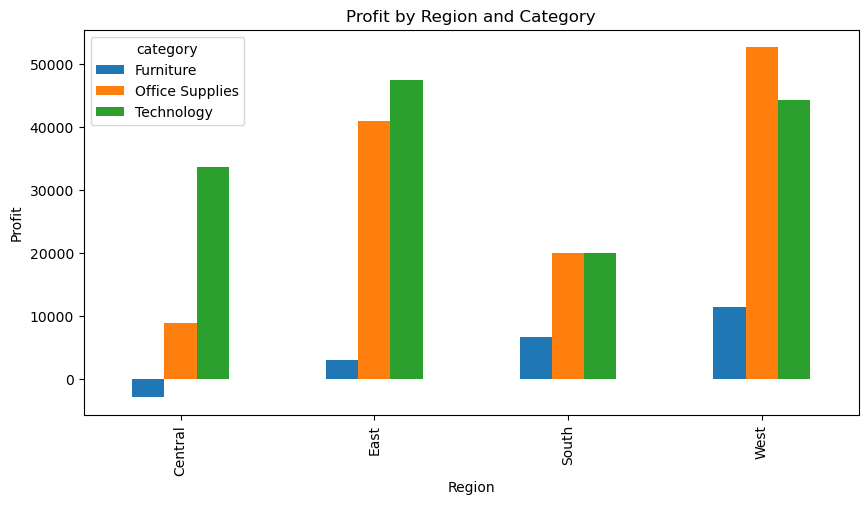

In [25]:
category_region_profit = (
    df.groupby(["region", "category"])["profit"]
    .sum()
    .unstack()
)

category_region_profit.plot(kind="bar", figsize=(10,5))
plt.title("Profit by Region and Category")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()


**Insight:** Profit contribution varies significantly by category across regions, indicating that regional strategy should differ by product category.


## Sales and Profit by Customer Segment

Understanding which customer segments contribute the most to revenue and profitability.


In [26]:
df.groupby("segment")[["sales", "profit"]].sum()


,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


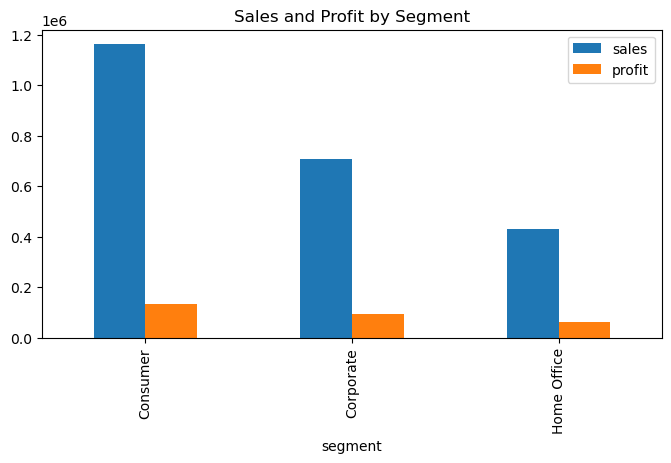

In [27]:
df.groupby("segment")[["sales", "profit"]].sum().plot(kind="bar", figsize=(8,4))
plt.title("Sales and Profit by Segment")
plt.show()


**Insight:** Certain customer segments generate high sales but lower profit, suggesting the need for pricing or discount optimization.


## Correlation Analysis

Correlation helps understand how numeric variables move together.


In [28]:
numeric_df = df[["sales", "quantity", "discount", "profit"]]
numeric_df.corr()


,sales,quantity,discount,profit
sales,1.000000,0.200795,-0.028190,0.479064
quantity,0.200795,1.000000,0.008623,0.066253
discount,-0.028190,0.008623,1.000000,-0.219487
profit,0.479064,0.066253,-0.219487,1.000000


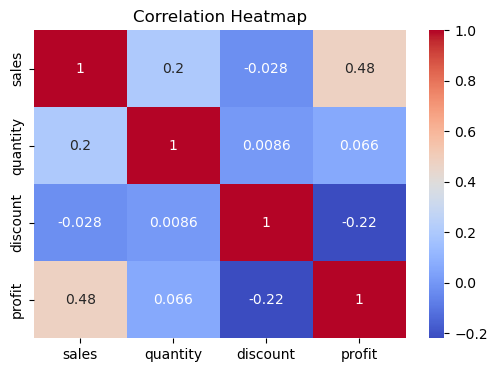

In [29]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Insight:** Discount shows a strong negative correlation with profit, confirming that excessive discounting reduces profitability.


## Multivariate Analysis – Key Findings

1. Technology dominates sales but does not always generate the highest profit.
2. The West region consistently performs well across categories.
3. Consumer segment contributes the highest overall revenue.
4. Discounts negatively impact profit across all segments and regions.
5. Profitability depends on the combination of category, region, and discount strategy—not sales alone.


# Business Recommendations & Executive Summary

The goal of this analysis is to provide data-driven recommendations that can help the business improve profitability, optimize operations, and refine strategic decision-making.


## Key Business Problems Identified

Based on exploratory data analysis, the following business challenges were identified:


1. Some regions show strong sales but weak profitability, indicating high discounting or operational inefficiencies.

2. Excessive discounting is negatively impacting profitability.
3. Certain regions generate strong revenue but weaker profits.
4. Some product categories underperform despite high order volume.


## Business Recommendations


### 1. Optimize Discount Strategy

- Discounts show a strong negative correlation with profit.
- High discounts should be limited to strategic products only.
- Introduce discount caps based on product category and region.


### 2. Focus on High-Profit Categories

- Technology generates the highest sales but not always the highest profit.
- Furniture shows strong profitability in specific regions.
- Marketing efforts should prioritize high-margin products over high-volume products.


### 3. Region-Specific Strategy

- The West region performs consistently well across categories.
- Regions with high sales but low profit need pricing and logistics optimization.
- Region-based promotional strategies should replace a one-size-fits-all approach.


### 4. Improve Customer Segment Targeting

- The Consumer segment contributes the highest revenue.
- Corporate and Home Office segments show potential for higher profitability.
- Introduce customized pricing and offers based on customer segment behavior.


## Executive Summary

This exploratory data analysis revealed that profitability is influenced by a combination of product category, region, discount strategy, and customer segment.

While overall sales performance is strong, profit margins are negatively affected by excessive discounting and suboptimal regional strategies.

By optimizing discounts, focusing on high-margin products, and implementing region-specific sales strategies, the business can significantly improve profitability while maintaining revenue growth.


## Conclusion

This project demonstrates how exploratory data analysis can uncover hidden inefficiencies and guide strategic business decisions. The insights generated can support future initiatives such as predictive modeling, customer segmentation, and sales forecasting.
